In [1]:
import numpy
%matplotlib nbagg
from matplotlib import pyplot
from tqdm import tqdm, tnrange
from astropy.io import fits

import aotools
from aotools.turbulence import infinitephasescreen_fried, phasescreen, infinitephasescreen


# Test the Zernike power spectrum of the Fried infinite phase screen

In [2]:
n_zerns = 60
nx_size = 256
D = 4.2
pxl_scale = D/nx_size
r0 = 0.164
L0 = 100
wind_speed = 10 #m/s - just arbitrarily set
n_tests = 16
n_scrns = 10000
noll = fits.getdata("resources/noll.fits").diagonal() * (D/r0)**(5./3)
stencil_length_factor = 32

In [3]:
# Create arrary of zernikes
print("Make Zernikes...")
Zs = aotools.zernikeArray(n_zerns, nx_size)

Make Zernikes...


In [4]:

stencil_length_factor = 16


time_step = pxl_scale/wind_speed # This is timestep, as one pixel added on each iteration


print("Run tests")
z_coeffs_inf_f = numpy.zeros((n_tests, n_scrns, n_zerns))
# fig = pyplot.figure()

for n in tnrange(n_tests):
                              
    print("Init phase screen")
    phase_screen = infinitephasescreen_fried.PhaseScreen(nx_size, pxl_scale, r0, L0, stencil_length_factor=stencil_length_factor)

    print("Total Stencil Size: {}m".format(stencil_length_factor*phase_screen.nx_size * pxl_scale))
    for i in tnrange(n_scrns):
        
        # Go in all directions
        phase_screen.addRow()
        if n%4 == 0:
            scrn = phase_screen.scrn
        elif n%4 == 1:
            scrn = phase_screen.scrn.T
        elif n%4 == 2:
            scrn = phase_screen.scrn[::-1]
        else:
            scrn = phase_screen.scrn[::-1].T
            
        z_coeffs_inf_f[n, i] = (scrn * Zs).sum((-1, -2))/(Zs[0].sum())
    
#         pyplot.cla()
#         pyplot.imshow(scrn)
#         fig.canvas.draw()
    
z_vars_inf_f = z_coeffs_inf_f.var(1)


Run tests


Init phase screen
New size: 257
Total Stencil Size: 67.4625m


C:\Users\apr\CfAI\aotools\aotools\turbulence\infinitephasescreen_fried.py:221: RuntimeWarning: overflow encountered in add
  new_row = self.A_mat.dot(stencil_data - reference_value) + self.B_mat.dot(random_data) + reference_value
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: RuntimeWarning: invalid value encountered in multiply
C:\Users\apr\CfAI\aotools\aotools\turbulence\infinitephasescreen_fried.py:221: RuntimeWarning: overflow encountered in subtract
  new_row = self.A_mat.dot(stencil_data - reference_value) + self.B_mat.dot(random_data) + reference_value


Init phase screen
New size: 257
Total Stencil Size: 67.4625m


Init phase screen
New size: 257
Total Stencil Size: 67.4625m


Init phase screen
New size: 257
Total Stencil Size: 67.4625m


Init phase screen
New size: 257
Total Stencil Size: 67.4625m


Init phase screen
New size: 257
Total Stencil Size: 67.4625m


C:\Users\apr\CfAI\aotools\aotools\turbulence\infinitephasescreen_fried.py:221: RuntimeWarning: invalid value encountered in subtract
  new_row = self.A_mat.dot(stencil_data - reference_value) + self.B_mat.dot(random_data) + reference_value


Init phase screen
New size: 257
Total Stencil Size: 67.4625m


Init phase screen
New size: 257
Total Stencil Size: 67.4625m


Init phase screen
New size: 257
Total Stencil Size: 67.4625m


Init phase screen
New size: 257
Total Stencil Size: 67.4625m


Init phase screen
New size: 257
Total Stencil Size: 67.4625m


Init phase screen
New size: 257
Total Stencil Size: 67.4625m


Init phase screen
New size: 257
Total Stencil Size: 67.4625m


Init phase screen
New size: 257
Total Stencil Size: 67.4625m


Init phase screen
New size: 257
Total Stencil Size: 67.4625m


Init phase screen
New size: 257
Total Stencil Size: 67.4625m


<IPython.core.display.Javascript object>


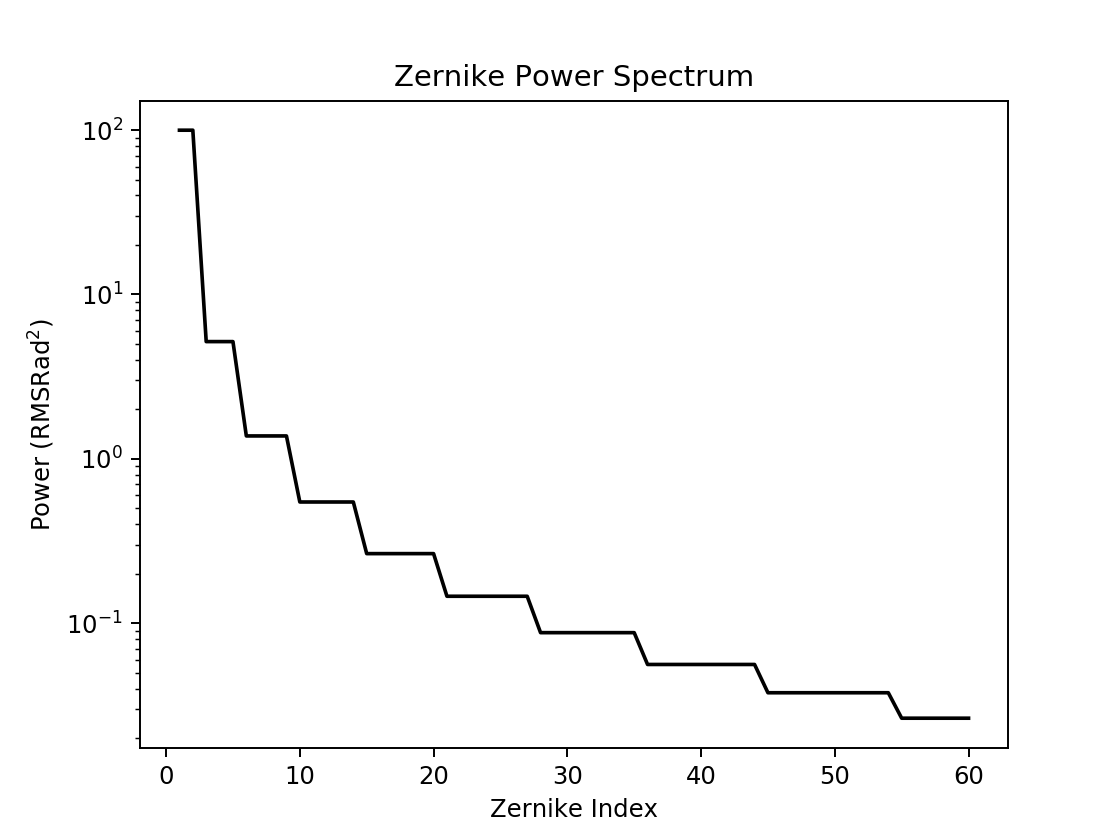

In [8]:
pyplot.figure()
pyplot.semilogy(z_vars_inf_f.T, alpha=0.2)
pyplot.semilogy(z_vars_inf_f.mean(0), color="k")
pyplot.semilogy(range(1, n_zerns+1), noll[:n_zerns] , label="noll", color="k") 
pyplot.title("Zernike Power Spectrum")
pyplot.xlabel("Zernike Index")
pyplot.ylabel("Power ($\mathrm{RMS Rad}^2$)")

<IPython.core.display.Javascript object>


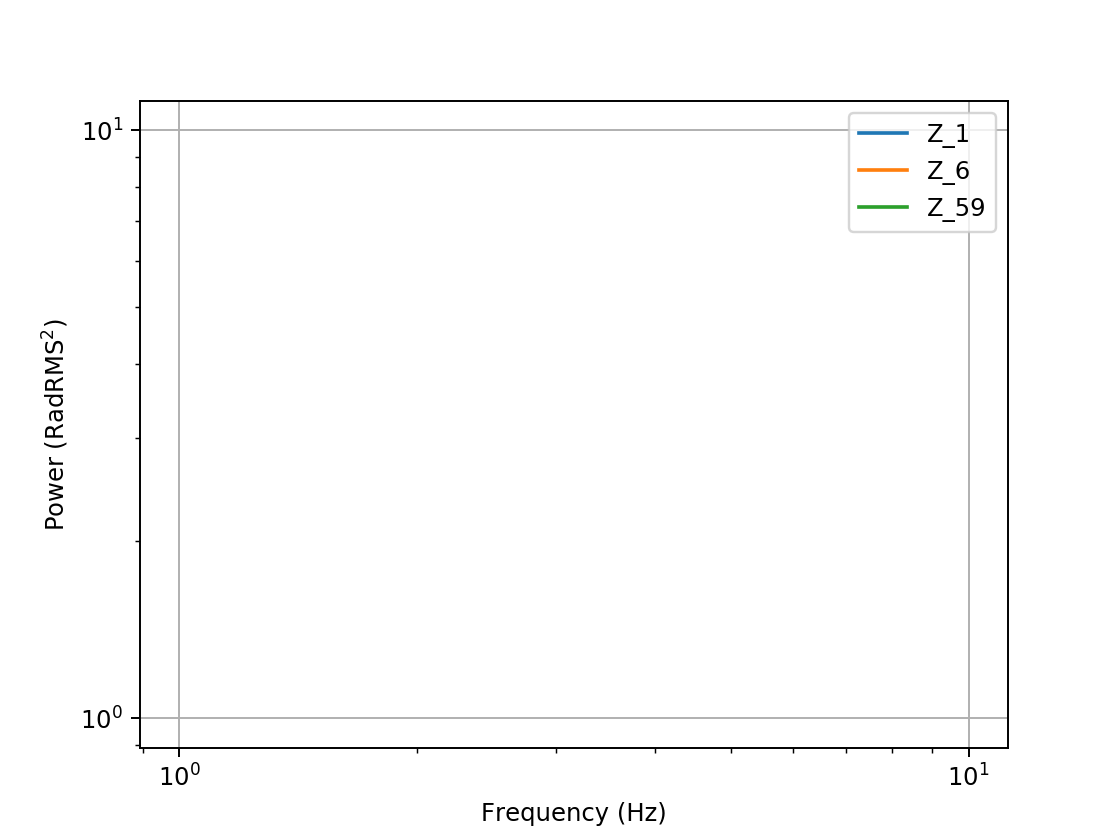

plot Z1
plot Z6
plot Z59


In [9]:
pyplot.figure()
plot_zs = [1, 6, 59]
for i, z in enumerate(plot_zs):
    print("plot Z{}".format(z))
    zn_coeffs = z_coeffs_inf_f.mean(0)[:, z]
    z_ps = abs(numpy.fft.fft(zn_coeffs))**2
    x_vals = numpy.fft.fftfreq(len(z_ps), d=time_step)
    pyplot.loglog(x_vals[:n_scrns//2], z_ps[:n_scrns//2], label="Z_{}".format(z))
    pyplot.xlabel("Frequency (Hz)")
    pyplot.ylabel("Power ($\mathrm{Rad RMS}^2$)")
    pyplot.grid()
pyplot.legend()

# Test Assemat Phase Screen

In [7]:
nCol = 2
time_step = pxl_scale/wind_speed # This is timestep, as one pixel added on each iteration

print("Run tests")
z_coeffs_inf_a = numpy.zeros((n_tests, n_scrns, n_zerns))
# fig = pyplot.figure()

for n in tnrange(n_tests):
    print("Init phase screen")
    phase_screen = infinitephasescreen.PhaseScreen(nx_size, pxl_scale, r0, L0, nCol=nCol)
    for i in tnrange(n_scrns):
        
        # Go in all directions
        phase_screen.addRow()
        if n%4 == 0:
            scrn = phase_screen.scrn
        elif n%4 == 1:
            scrn = phase_screen.scrn.T
        elif n%4 == 2:
            scrn = phase_screen.scrn[::-1]
        else:
            scrn = phase_screen.scrn[::-1].T
            
        z_coeffs_inf_a[n, i] = (scrn * Zs).sum((-1, -2))/(Zs[0].sum())
    
#         pyplot.cla()
#         pyplot.imshow(scrn)
#         fig.canvas.draw()
    
z_vars_inf_a = z_coeffs_inf_a.var(1)

Run tests


Init phase screen



LinAlgError: 355-th leading minor not positive definite

In [ ]:
pyplot.figure()
pyplot.semilogy(z_vars_inf_a.T, alpha=0.2)
pyplot.semilogy(z_vars_inf_a.mean(0), color="k")
pyplot.title("Zernike Power Spectrum")
pyplot.xlabel("Zernike Index")
pyplot.ylabel("Power ($\mathrm{RMS Rad}^2$)")

# Test Assemat phase screen with new code

In [ ]:
nCol = 2
time_step = pxl_scale/wind_speed # This is timestep, as one pixel added on each iteration

print("Run tests")
z_coeffs_inf_a2 = numpy.zeros((n_tests, n_scrns, n_zerns))
# fig = pyplot.figure()

for n in tnrange(n_tests):
    print("Init phase screen")
    phase_screen = infinitephasescreen.PhaseScreen2(nx_size, pxl_scale, r0, L0, n_columns=nCol)
    for i in tnrange(n_scrns):
        
        # Go in all directions
        phase_screen.addRow()
        if n%4 == 0:
            scrn = phase_screen.scrn
        elif n%4 == 1:
            scrn = phase_screen.scrn.T
        elif n%4 == 2:
            scrn = phase_screen.scrn[::-1]
        else:
            scrn = phase_screen.scrn[::-1].T
            
        z_coeffs_inf_a2[n, i] = (scrn * Zs).sum((-1, -2))/(Zs[0].sum())
    
#         pyplot.cla()
#         pyplot.imshow(scrn)
#         fig.canvas.draw()
    
z_vars_inf_a2 = z_coeffs_inf_a2.var(1)

In [ ]:
pyplot.figure()
pyplot.semilogy(z_vars_inf_a.T, alpha=0.2)
pyplot.semilogy(z_vars_inf_a.mean(0), color="k")
pyplot.title("Zernike Power Spectrum")
pyplot.xlabel("Zernike Index")
pyplot.ylabel("Power ($\mathrm{RMS Rad}^2$)")

In [ ]:
pyplot.figure()
pyplot.imshow(phase_screen.B_mat)
pyplot.colorbar()

In [ ]:
pyplot.figure()
pyplot.imshow(phase_screen.A_mat)
pyplot.colorbar()

In [ ]:
pyplot.figure()
pyplot.imshow(phase_screen.cov_mat_zz)
pyplot.colorbar()

# Zernike breakdown of standard FFT screen

In [ ]:
total_scrn_size = stencil_length_factor * nx_size
print("Total Screen Size: {}".format(total_scrn_size))

time_step = pxl_scale/wind_speed # This is timestep, as one pixel added on each iteration
print("Time step: {}s".format(time_step))

n_scrns = total_scrn_size - nx_size

z_coeffs_fft = numpy.zeros((n_tests, n_scrns, n_zerns))
z_vars_fft = numpy.zeros((n_tests, n_zerns))
for n in tnrange(n_tests):
    print("Make large phase screen...")
    phase_screen = phasescreen.ft_phase_screen(r0, total_scrn_size, pxl_scale, L0, 0.01)[:, :nx_size]

    print("Get Zernike Coeffs")
#     fig = pyplot.figure()
    for i in tnrange(n_scrns):
        scrn = phase_screen[i:i+nx_size]
        
        if n%4 == 0:
            scrn = scrn
        elif n%4 == 1:
            scrn = scrn.T
        elif n%4 == 2:
            scrn = scrn[::-1]
        else:
            scrn = scrn[::-1].T
        
#         pyplot.cla()
#         pyplot.imshow(scrn)
#         fig.canvas.draw()
        z_coeffs_fft[n, i] = (scrn * Zs).sum((-1, -2))/(Zs[0].sum())

    z_vars_fft[n] = z_coeffs_fft[n].var(0)

In [ ]:
pyplot.figure()
pyplot.semilogy(z_vars_fft.T, alpha=0.2)
pyplot.semilogy(z_vars_fft.mean(0), color="k")
pyplot.title("Zernike Power Spectrum")
pyplot.xlabel("Zernike Index")
pyplot.ylabel("Power ($\mathrm{RMS Rad}^2$)")

In [ ]:
pyplot.figure()
plot_zs = [1, 6,59]
for i, z in enumerate(plot_zs):
    print("plot Z{}".format(z))
    zn_coeffs = z_coeffs_fft.mean(0)[:, z]
    z_ps = abs(numpy.fft.fft(zn_coeffs))**2
    x_vals = numpy.fft.fftfreq(len(z_ps), d=time_step)
    pyplot.loglog(x_vals[:n_scrns//2], z_ps[:n_scrns//2], label="Z_{}".format(z))
    pyplot.xlabel("Frequency (Hz)")
    pyplot.ylabel("Power ($\mathrm{Rad RMS}^2$)")
    pyplot.grid()
pyplot.legend()

In [ ]:
pyplot.figure()
pyplot.semilogy(z_vars_inf_f.mean(0), label="Fried Infinite")
pyplot.semilogy(z_vars_inf_a.mean(0), label="Assemat Infinite")
pyplot.semilogy(z_vars_inf_a2.mean(0), label="New Assemat Infinite")

pyplot.semilogy(z_vars_fft.mean(0), label="fft")
pyplot.semilogy(range(1, n_zerns+1), noll[:n_zerns] , label="noll", color="k") 
pyplot.title("Zernike Power Spectrum")
pyplot.xlabel("Zernike Index")
pyplot.ylabel("Power ($\mathrm{RMS Rad}^2$)")
pyplot.legend()